# Data Manipulation

## Reading the data

In [2]:
import pandas as pd

new_new_df = pd.read_csv('top_100_100_anime.csv')
gbtest = new_new_df.groupby("user_id")

In [4]:
import numpy as np
import json

filename = 'array_anime.csv'

# Read the array from the CSV file
mat = np.loadtxt(filename, delimiter=',')

## reading genre mapping and user mapping

In [5]:
with open('genre_map.txt', 'r') as file:
    genre_map = json.load(file)

print(genre_map)

{'Action, Adventure, Comedy, Drama, Fantasy, Kids': 0, 'Action, Adventure, Comedy, Drama, Fantasy, Magic, Military, Shounen': 1, 'Action, Adventure, Comedy, Drama, Sci-Fi, Space': 2, 'Action, Adventure, Comedy, Ecchi, Fantasy, Harem, Magic, Romance, School': 3, 'Action, Adventure, Comedy, Fantasy, Kids': 4, 'Action, Adventure, Comedy, Fantasy, Magic, Shounen': 5, 'Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power': 6, 'Action, Adventure, Comedy, Fantasy, Shounen, Super Power': 7, 'Action, Adventure, Comedy, Fantasy, Shounen, Supernatural': 8, 'Action, Adventure, Comedy, Mecha, Sci-Fi': 9, 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen': 10, 'Action, Adventure, Fantasy': 11, 'Action, Adventure, Fantasy, Game, Magic, Shounen': 12, 'Action, Adventure, Fantasy, Game, Romance': 13, 'Action, Adventure, Fantasy, Magic, Shounen': 14, 'Action, Adventure, Shounen, Super Power': 15, 'Action, Adventure, Shounen, Supernatural': 16, 'Action, Comedy, Drama, School, 

In [14]:
with open('user_id_map.txt', 'r') as file:
    user_id_map = json.load(file)
user_id_map = {(float(key)): value for key, value in user_id_map.items()}
print(user_id_map)

{1530.0: 0, 2951.0: 1, 3569.0: 2, 4468.0: 3, 7081.0: 4, 7247.0: 5, 7345.0: 6, 7511.0: 7, 8115.0: 8, 8122.0: 9, 8217.0: 10, 9032.0: 11, 10796.0: 12, 11536.0: 13, 12431.0: 14, 13954.0: 15, 14307.0: 16, 17033.0: 17, 17095.0: 18, 17815.0: 19, 18579.0: 20, 20171.0: 21, 20637.0: 22, 21588.0: 23, 21640.0: 24, 21748.0: 25, 22062.0: 26, 22434.0: 27, 22815.0: 28, 23247.0: 29, 23465.0: 30, 23512.0: 31, 23715.0: 32, 23975.0: 33, 25252.0: 34, 26691.0: 35, 27219.0: 36, 28196.0: 37, 28322.0: 38, 28521.0: 39, 28892.0: 40, 29013.0: 41, 29255.0: 42, 29272.0: 43, 30196.0: 44, 30565.0: 45, 30597.0: 46, 30956.0: 47, 34796.0: 48, 34920.0: 49, 36696.0: 50, 37351.0: 51, 38804.0: 52, 39477.0: 53, 39921.0: 54, 40273.0: 55, 40722.0: 56, 40997.0: 57, 41303.0: 58, 41462.0: 59, 42635.0: 60, 45659.0: 61, 47652.0: 62, 47849.0: 63, 49186.0: 64, 49503.0: 65, 49662.0: 66, 50058.0: 67, 50761.0: 68, 51270.0: 69, 51562.0: 70, 51693.0: 71, 51997.0: 72, 52175.0: 73, 52964.0: 74, 53492.0: 75, 53494.0: 76, 53698.0: 77, 53713.0

## Using genre wise average ratings of each user instead of SVNS

In [7]:
#function to find average rating
def avg_rating(df):
    temp = [ 0 for i in range(new_new_df['genre'].nunique())]
    df = df.reset_index()
    sum = 0
    for g in df['genre'].unique():
        #print(g)
        rat = df[df['genre'] == g]
        avg = rat["rating"].mean()     
        temp[genre_map[g]]= avg
    return temp   

In [8]:
u_g_avg = pd.DataFrame(gbtest.apply(avg_rating)).reset_index()
u_g_avg

,user_id,0
0,1530.0,"[7.714285714285714, 7.0, 2.0, 0, 7.0, 7.25, 7...."
1,2951.0,"[0, 9.0, 6.5, 7.666666666666667, 0, 9.25, 0, 0..."
2,3569.0,"[0, 5.5, 7.5, 0, 0, 0, 0, 0, 0, 7.0, 9.0, 6.33..."
3,4468.0,"[7.0, 8.5, 5.0, 7.0, 7.0, 3.0, 6.3333333333333..."
4,7081.0,"[0, 0, 8.5, 7.333333333333333, 0, 0, 6.75, 7.0..."
...,...,...
95,67348.0,"[7.0, 8.0, 8.0, 8.0, 7.0, 9.0, 8.0, 8.0, 9.0, ..."
96,68084.0,"[6.25, 8.0, 0, 8.333333333333334, 6.6666666666..."
97,68797.0,"[7.333333333333333, 7.5, 10.0, 6.6666666666666..."
98,70507.0,"[0, 8.0, 0, 8.0, 0, 7.666666666666667, 0, 0, 0..."


In [9]:
test_crossjoin1 = u_g_avg
test_crossjoin1['key'] = 1
resultx = pd.merge(test_crossjoin1, test_crossjoin1, on ='key').drop(["key"],axis=1)
resultx

,user_id_x,0_x,user_id_y,0_y
0,1530.0,"[7.714285714285714, 7.0, 2.0, 0, 7.0, 7.25, 7....",1530.0,"[7.714285714285714, 7.0, 2.0, 0, 7.0, 7.25, 7...."
1,1530.0,"[7.714285714285714, 7.0, 2.0, 0, 7.0, 7.25, 7....",2951.0,"[0, 9.0, 6.5, 7.666666666666667, 0, 9.25, 0, 0..."
2,1530.0,"[7.714285714285714, 7.0, 2.0, 0, 7.0, 7.25, 7....",3569.0,"[0, 5.5, 7.5, 0, 0, 0, 0, 0, 0, 7.0, 9.0, 6.33..."
3,1530.0,"[7.714285714285714, 7.0, 2.0, 0, 7.0, 7.25, 7....",4468.0,"[7.0, 8.5, 5.0, 7.0, 7.0, 3.0, 6.3333333333333..."
4,1530.0,"[7.714285714285714, 7.0, 2.0, 0, 7.0, 7.25, 7....",7081.0,"[0, 0, 8.5, 7.333333333333333, 0, 0, 6.75, 7.0..."
...,...,...,...,...
9995,71284.0,"[10.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",67348.0,"[7.0, 8.0, 8.0, 8.0, 7.0, 9.0, 8.0, 8.0, 9.0, ..."
9996,71284.0,"[10.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",68084.0,"[6.25, 8.0, 0, 8.333333333333334, 6.6666666666..."
9997,71284.0,"[10.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",68797.0,"[7.333333333333333, 7.5, 10.0, 6.6666666666666..."
9998,71284.0,"[10.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",70507.0,"[0, 8.0, 0, 8.0, 0, 7.666666666666667, 0, 0, 0..."


### Mapping each pair of users with their average rating list and cosine similarity

In [10]:
def mapping_userid_xandy(row):
    return mat[user_id_map[row['user_id_x']],user_id_map[row['user_id_y']]]

In [15]:
resultx["cosin"] = resultx.apply(mapping_userid_xandy,axis = 1)
resultx

,user_id_x,0_x,user_id_y,0_y,cosin
0,1530.0,"[7.714285714285714, 7.0, 2.0, 0, 7.0, 7.25, 7....",1530.0,"[7.714285714285714, 7.0, 2.0, 0, 7.0, 7.25, 7....",1.000000
1,1530.0,"[7.714285714285714, 7.0, 2.0, 0, 7.0, 7.25, 7....",2951.0,"[0, 9.0, 6.5, 7.666666666666667, 0, 9.25, 0, 0...",0.547603
2,1530.0,"[7.714285714285714, 7.0, 2.0, 0, 7.0, 7.25, 7....",3569.0,"[0, 5.5, 7.5, 0, 0, 0, 0, 0, 0, 7.0, 9.0, 6.33...",0.434782
3,1530.0,"[7.714285714285714, 7.0, 2.0, 0, 7.0, 7.25, 7....",4468.0,"[7.0, 8.5, 5.0, 7.0, 7.0, 3.0, 6.3333333333333...",0.619480
4,1530.0,"[7.714285714285714, 7.0, 2.0, 0, 7.0, 7.25, 7....",7081.0,"[0, 0, 8.5, 7.333333333333333, 0, 0, 6.75, 7.0...",0.532532
...,...,...,...,...,...
9995,71284.0,"[10.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",67348.0,"[7.0, 8.0, 8.0, 8.0, 7.0, 9.0, 8.0, 8.0, 9.0, ...",0.294047
9996,71284.0,"[10.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",68084.0,"[6.25, 8.0, 0, 8.333333333333334, 6.6666666666...",0.334177
9997,71284.0,"[10.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",68797.0,"[7.333333333333333, 7.5, 10.0, 6.6666666666666...",0.300161
9998,71284.0,"[10.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",70507.0,"[0, 8.0, 0, 8.0, 0, 7.666666666666667, 0, 0, 0...",0.505139


In [16]:
resultx['0_x'][0]

[7.714285714285714,
 7.0,
 2.0,
 0,
 7.0,
 7.25,
 7.666666666666667,
 7.0,
 10.0,
 0,
 10.0,
 10.0,
 8.0,
 7.666666666666667,
 7.333333333333333,
 7.75,
 7.75,
 9.0,
 7.5,
 8.0,
 7.0,
 8.8,
 7.5,
 6.0,
 7.5,
 6.5,
 8.333333333333334,
 6.0,
 7.0,
 8.666666666666666,
 6.75,
 8.0,
 8.0,
 6.9,
 0,
 6.5,
 4.0,
 8.0,
 7.0,
 9.0,
 8.75,
 0,
 6.071428571428571,
 9.0,
 9.0,
 7.8,
 9.0,
 7.166666666666667,
 6.4,
 6.75,
 10.0,
 7.5,
 0,
 0,
 0,
 0,
 8.0,
 5.836734693877551,
 6.5,
 7.666666666666667,
 8.75,
 7.0,
 0,
 0,
 7.0,
 7.0,
 7.0,
 7.0,
 6.25,
 9.0,
 0,
 5.181818181818182,
 0,
 7.142857142857143,
 6.0,
 7.166666666666667,
 8.0,
 8.0,
 6.666666666666667,
 6.5,
 6.5,
 6.714285714285714,
 0,
 6.454545454545454,
 8.166666666666666,
 6.111111111111111,
 4.0,
 6.166666666666667,
 6.5,
 7.0,
 6.5,
 8.0,
 0,
 7.0,
 0,
 10.0,
 8.5,
 0,
 7.0,
 8.5]

In [17]:
import math
def genre_wise_pearsonsimilarity(row):
    temp = [ 0 for i in range(len(resultx['0_x'][0]))]
    for j in range(0,len(row)):
        #temp[j] = (np.corrcoef(row['0_x'][j], row['0_y'][j])[0, 1])
        temp[j] = (row['0_x'][j] + row['0_y'][j])/2
    return temp

In [18]:
result_avg = pd.DataFrame()
result_avg['User1'] = resultx['user_id_x']
result_avg['User2'] = resultx['user_id_y']

In [19]:
result_avg['genre_based_cosinesimilarity'] = resultx.apply(genre_wise_pearsonsimilarity,axis=1)

In [20]:
result_avg["Cosine_between_user"] = resultx['cosin']
result_avg

,User1,User2,genre_based_cosinesimilarity,Cosine_between_user
0,1530.0,1530.0,"[7.714285714285714, 7.0, 2.0, 0.0, 7.0, 0, 0, ...",1.000000
1,1530.0,2951.0,"[3.857142857142857, 8.0, 4.25, 3.8333333333333...",0.547603
2,1530.0,3569.0,"[3.857142857142857, 6.25, 4.75, 0.0, 3.5, 0, 0...",0.434782
3,1530.0,4468.0,"[7.357142857142858, 7.75, 3.5, 3.5, 7.0, 0, 0,...",0.619480
4,1530.0,7081.0,"[3.857142857142857, 3.5, 5.25, 3.6666666666666...",0.532532
...,...,...,...,...
9995,71284.0,67348.0,"[8.5, 4.0, 4.0, 4.0, 3.5, 0, 0, 0, 0, 0, 0, 0,...",0.294047
9996,71284.0,68084.0,"[8.125, 4.0, 0.0, 4.166666666666667, 3.3333333...",0.334177
9997,71284.0,68797.0,"[8.666666666666666, 3.75, 5.0, 3.3333333333333...",0.300161
9998,71284.0,70507.0,"[5.0, 4.0, 0.0, 4.0, 0.0, 0, 0, 0, 0, 0, 0, 0,...",0.505139


In [21]:
r_test_avg = pd.DataFrame(result_avg['genre_based_cosinesimilarity'])
r_test_avg = pd.DataFrame(r_test_avg.genre_based_cosinesimilarity.tolist(), index= r_test_avg.index)
r_test_avg["Cosine_between_user"] = resultx['cosin']
r_test_avg

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Cosine_between_user
0,7.714286,7.00,2.00,0.000000,7.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
1,3.857143,8.00,4.25,3.833333,3.500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.547603
2,3.857143,6.25,4.75,0.000000,3.500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.434782
3,7.357143,7.75,3.50,3.500000,7.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.619480
4,3.857143,3.50,5.25,3.666667,3.500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.532532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8.500000,4.00,4.00,4.000000,3.500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.294047
9996,8.125000,4.00,0.00,4.166667,3.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.334177
9997,8.666667,3.75,5.00,3.333333,3.428571,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.300161
9998,5.000000,4.00,0.00,4.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.505139


In [22]:
r_test_avg.to_csv("training_data_anime_baseline.csv")

# Training Regression Models 

In [23]:
train_anime_base = pd.read_csv("training_data_anime_baseline.csv")

In [24]:
from pycaret.regression import *
exp_reg101 = setup(data = train_anime_base, target = 'Cosine_between_user',session_id = 123)

,Description,Value
0,Session id,123
1,Target,Cosine_between_user
2,Target type,Regression
3,Original data shape,"(10000, 102)"
4,Transformed data shape,"(10000, 102)"
5,Transformed train set shape,"(7000, 102)"
6,Transformed test set shape,"(3000, 102)"
7,Numeric features,101
8,Preprocess,True
9,Imputation type,simple


In [25]:
best_anime_base = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0680,0.0105,0.1025,0.5191,0.0703,0.5347,0.3760
rf,Random Forest Regressor,0.0732,0.0109,0.1041,0.5032,0.0717,0.6107,0.3770
lightgbm,Light Gradient Boosting Machine,0.0784,0.0115,0.1072,0.4728,0.0743,0.6342,0.3450
xgboost,Extreme Gradient Boosting,0.0768,0.0117,0.1081,0.4637,0.0746,0.6099,0.3220
gbr,Gradient Boosting Regressor,0.0901,0.0139,0.1180,0.3616,0.0821,0.8312,0.3430
br,Bayesian Ridge,0.1032,0.0177,0.1331,0.1885,0.0929,1.0197,0.3320
lar,Least Angle Regression,0.1032,0.0177,0.1331,0.1884,0.0929,1.0184,0.3230
omp,Orthogonal Matching Pursuit,0.1032,0.0177,0.1331,0.1884,0.0929,1.0184,0.3160
ridge,Ridge Regression,0.1032,0.0177,0.1331,0.1884,0.0929,1.0184,0.3120
lr,Linear Regression,0.1032,0.0177,0.1331,0.1884,0.0929,1.0184,0.8340


## Tuning and plotting the top 5 models

In [26]:
XGBOOST = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0743,0.0108,0.1037,0.4529,0.0722,0.9186
1,0.0791,0.0143,0.1194,0.3897,0.0807,0.4086
2,0.0767,0.0107,0.1035,0.4813,0.0731,0.5841
3,0.0758,0.0111,0.1053,0.4887,0.0724,0.2993
4,0.0816,0.0128,0.1132,0.4521,0.0788,0.9812
5,0.0759,0.0124,0.1112,0.4662,0.0762,0.5258
6,0.0748,0.0112,0.1058,0.4667,0.0730,0.7246
7,0.0799,0.0130,0.1138,0.3974,0.0774,0.2212
8,0.0752,0.0101,0.1007,0.5221,0.0699,0.7120


In [27]:
tuned_XGBOOST, tuner = tune_model(XGBOOST, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0787,0.0114,0.1070,0.4175,0.0745,0.7633
1,0.0828,0.0146,0.1207,0.3771,0.0816,0.3411
2,0.0816,0.0117,0.1081,0.4343,0.0762,0.5522
3,0.0795,0.0119,0.1090,0.4522,0.0750,0.2971
4,0.0846,0.0133,0.1153,0.4315,0.0803,0.9820
5,0.0795,0.0123,0.1108,0.4700,0.0763,0.4660
6,0.0782,0.0112,0.1057,0.4673,0.0734,0.8855
7,0.0846,0.0136,0.1166,0.3672,0.0793,0.2285
8,0.0780,0.0107,0.1034,0.4959,0.0717,0.7155


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [28]:
print(tuner)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\abhij\AppData\Local\Temp\joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Unnamed: '
                                                                          '0',
                                                                          '0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          '6',
                               

In [32]:
with open('tuner_xgboost_anime_nosvns.txt', 'w') as file:
    file.write(str(tuner))

In [29]:
tuned_XGBOOST

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

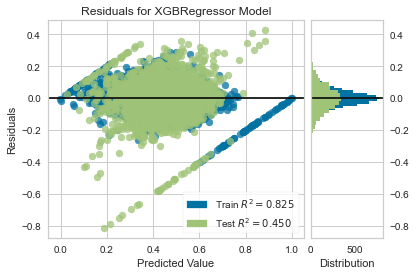

In [30]:
plot_model(tuned_XGBOOST)

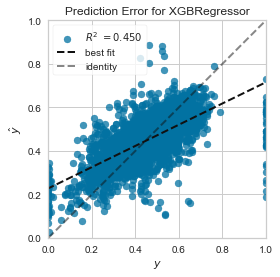

In [31]:
plot_model(tuned_XGBOOST, plot='error')

In [33]:
randomforest = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0715,0.0101,0.1005,0.4856,0.0704,0.9858
1,0.0760,0.0134,0.1156,0.4280,0.0776,0.3424
2,0.0729,0.0097,0.0985,0.5304,0.0694,0.5154
3,0.0718,0.0100,0.1001,0.5372,0.0686,0.3264
4,0.0768,0.0118,0.1085,0.4972,0.0755,0.9343
5,0.0755,0.0121,0.1102,0.4761,0.0750,0.5274
6,0.0703,0.0100,0.1001,0.5225,0.0693,0.8477
7,0.0751,0.0115,0.1074,0.4634,0.0730,0.2066
8,0.0713,0.0097,0.0984,0.5434,0.0679,0.6578


In [34]:
tuned_randomforest, tuner_rf = tune_model(randomforest, return_tuner=True,choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0961,0.0154,0.1243,0.2141,0.0876,1.5422
1,0.1047,0.0188,0.1370,0.1964,0.0936,0.5622
2,0.1002,0.0160,0.1265,0.2257,0.0894,0.8260
3,0.1011,0.0170,0.1304,0.2159,0.0903,0.6773
4,0.1055,0.0187,0.1368,0.2002,0.0963,1.4688
5,0.1031,0.0179,0.1340,0.2259,0.0932,0.8114
6,0.0991,0.0162,0.1272,0.2287,0.0895,1.5078
7,0.1039,0.0179,0.1339,0.1658,0.0927,0.3111
8,0.1013,0.0166,0.1286,0.2198,0.0901,1.8007


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [35]:
print(tuner_rf)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\abhij\AppData\Local\Temp\joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Unnamed: '
                                                                          '0',
                                                                          '0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          '6',
                               

In [36]:
with open('tuner_random_forest_anime_nosvns.txt', 'w') as file:
    file.write(str(tuner_rf))

In [37]:
tuned_randomforest

RandomForestRegressor(n_jobs=-1, random_state=123)

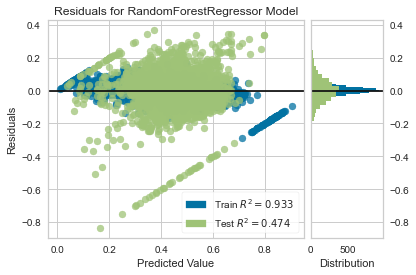

In [38]:
plot_model(tuned_randomforest)

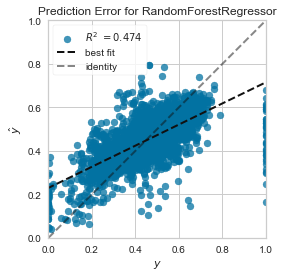

In [39]:
plot_model(tuned_randomforest, plot='error')

In [40]:
LightgradientBoost = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0760,0.0107,0.1033,0.4566,0.0723,0.9550
1,0.0806,0.0137,0.1171,0.4135,0.0790,0.3646
2,0.0792,0.0108,0.1040,0.4766,0.0735,0.6102
3,0.0778,0.0112,0.1058,0.4831,0.0731,0.3874
4,0.0823,0.0127,0.1127,0.4573,0.0787,0.9930
5,0.0794,0.0127,0.1127,0.4521,0.0773,0.5286
6,0.0754,0.0102,0.1008,0.5154,0.0702,0.8357
7,0.0811,0.0122,0.1106,0.4309,0.0758,0.2320
8,0.0776,0.0107,0.1034,0.4963,0.0717,0.7499


In [41]:
tuned_LightgradientBoost, tuner_lgbm = tune_model(LightgradientBoost, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0907,0.0138,0.1175,0.2972,0.0829,1.4516
1,0.0988,0.0172,0.1310,0.2654,0.0891,0.5231
2,0.0942,0.0143,0.1197,0.3070,0.0843,0.7583
3,0.0958,0.0154,0.1242,0.2876,0.0863,0.5764
4,0.1007,0.0170,0.1304,0.2738,0.0915,1.2668
5,0.0944,0.0157,0.1251,0.3244,0.0865,0.6976
6,0.0900,0.0139,0.1180,0.3360,0.0826,1.2344
7,0.0993,0.0167,0.1291,0.2250,0.0891,0.2880
8,0.0958,0.0151,0.1229,0.2877,0.0857,1.3727


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [42]:
with open('tuner_light_gradient_boost_anime_nosvns.txt', 'w') as file:
    file.write(str(tuner_lgbm))

In [43]:
tuned_LightgradientBoost

LGBMRegressor(random_state=123)

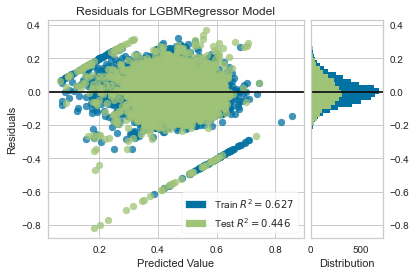

In [44]:
plot_model(tuned_LightgradientBoost)

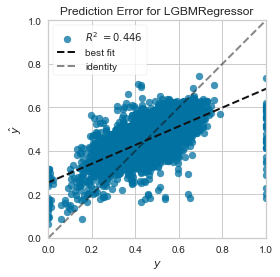

In [45]:
plot_model(tuned_LightgradientBoost, plot='error')

In [46]:
extratrees = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0654,0.0094,0.0969,0.5218,0.0674,0.7956
1,0.0689,0.0124,0.1115,0.4685,0.0742,0.3096
2,0.0693,0.0095,0.0976,0.5387,0.0686,0.4954
3,0.0672,0.0100,0.0999,0.5399,0.0681,0.2866
4,0.0718,0.0116,0.1076,0.5049,0.0745,0.8887
5,0.0688,0.0115,0.1073,0.5035,0.0724,0.3670
6,0.0651,0.0098,0.0988,0.5345,0.0682,0.7113
7,0.0711,0.0113,0.1062,0.4749,0.0717,0.1978
8,0.0650,0.0092,0.0959,0.5667,0.0663,0.7399


In [47]:
tuned_extratrees, tuner_et = tune_model(extratrees, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1043,0.0181,0.1344,0.0803,0.0948,1.7295
1,0.1137,0.0218,0.1478,0.0653,0.1014,0.6414
2,0.1086,0.0190,0.1378,0.0804,0.0975,0.9423
3,0.1107,0.0201,0.1416,0.0745,0.0980,0.7806
4,0.1148,0.0217,0.1472,0.0744,0.1038,1.6975
5,0.1141,0.0214,0.1462,0.0784,0.1019,0.9332
6,0.1101,0.0193,0.1389,0.0798,0.0978,1.7499
7,0.1109,0.0201,0.1418,0.0649,0.0984,0.3378
8,0.1103,0.0195,0.1397,0.0801,0.0979,2.1212


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [48]:
with open('tuner_extra_trees_anime_nosvns.txt', 'w') as file:
    file.write(str(tuner_et))

In [49]:
tuned_extratrees

ExtraTreesRegressor(n_jobs=-1, random_state=123)

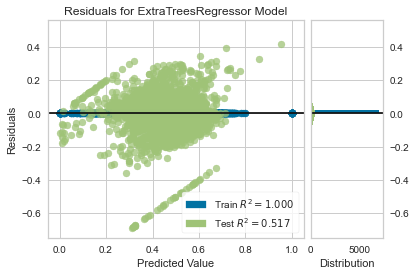

In [50]:
plot_model(tuned_extratrees)

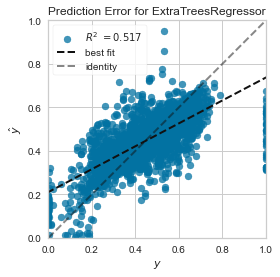

In [51]:
plot_model(tuned_extratrees, plot='error')

In [52]:
gradientboost = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0869,0.0128,0.1130,0.3504,0.0795,1.1995
1,0.0932,0.0160,0.1264,0.3164,0.0857,0.4692
2,0.0899,0.0131,0.1145,0.3652,0.0807,0.6869
3,0.0897,0.0137,0.1172,0.3664,0.0813,0.5138
4,0.0938,0.0149,0.1222,0.3622,0.0858,1.1678
5,0.0908,0.0147,0.1214,0.3642,0.0838,0.6472
6,0.0851,0.0126,0.1123,0.3992,0.0783,1.0049
7,0.0934,0.0152,0.1233,0.2922,0.0849,0.2675
8,0.0902,0.0134,0.1156,0.3697,0.0804,1.1546


In [53]:
tuned_gradientboost, tuner_gbr = tune_model(gradientboost, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0754,0.0106,0.1030,0.4597,0.0719,0.9288
1,0.0815,0.0141,0.1186,0.3986,0.0798,0.3574
2,0.0792,0.0107,0.1033,0.4834,0.0729,0.5898
3,0.0766,0.0109,0.1046,0.4948,0.0722,0.3755
4,0.0801,0.0124,0.1112,0.4714,0.0773,0.9288
5,0.0796,0.0128,0.1133,0.4463,0.0778,0.5372
6,0.0752,0.0105,0.1025,0.4988,0.0712,0.7730
7,0.0806,0.0124,0.1112,0.4242,0.0761,0.2265
8,0.0765,0.0105,0.1023,0.5062,0.0707,0.7898


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [54]:
with open('tuner_gradient_boost_anime_nosvns.txt', 'w') as file:
    file.write(str(tuner_gbr))

In [55]:
tuned_gradientboost

GradientBoostingRegressor(learning_rate=0.15, max_depth=7, max_features=1.0,
                          min_impurity_decrease=0.02, min_samples_leaf=5,
                          min_samples_split=5, n_estimators=230,
                          random_state=123, subsample=0.85)

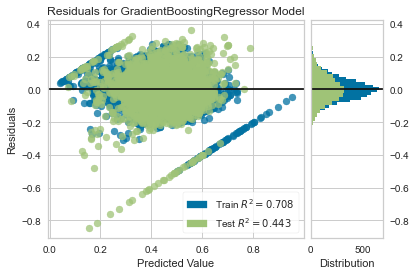

In [56]:
plot_model(tuned_gradientboost)

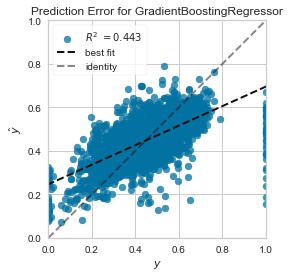

In [57]:
plot_model(tuned_gradientboost, plot='error')